<a href="https://colab.research.google.com/github/rahool010/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing python libraries that would help us immensely during our endeavour
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading the dataset
directory_path="/content/drive/MyDrive/dataset/SeoulBikeData.csv"  
seoul_df=pd.read_csv(directory_path,encoding= 'unicode_escape')

# Note: Please change the directory path where the file is stored while running in your system.

In [3]:
# lets check the first 5 and last 5 observations
seoul_df.head().append(seoul_df.tail())

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
# check the shape
seoul_df.shape

(8760, 14)

In [5]:
# finding the types of data in each column
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The dataset has 3 types of data namely: Integer, float, strings/objects

In [6]:
# printing unique values of each column 
for col in seoul_df.columns:
  print(f"{col}: \t{seoul_df[col].nunique()}")

Date: 	365
Rented Bike Count: 	2166
Hour: 	24
Temperature(°C): 	546
Humidity(%): 	90
Wind speed (m/s): 	65
Visibility (10m): 	1789
Dew point temperature(°C): 	556
Solar Radiation (MJ/m2): 	345
Rainfall(mm): 	61
Snowfall (cm): 	51
Seasons: 	4
Holiday: 	2
Functioning Day: 	2


In [7]:
seoul_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **1. Exploratory Data Analysis**

## Univariate analysis

<b> 1. "Rental Bike Count" - Dependent variable(dv)

In [8]:
# descriptive stats of dv
seoul_df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

It looks like their might be some outliers in our variable if we observe the min, max, 25% and 75% values. 

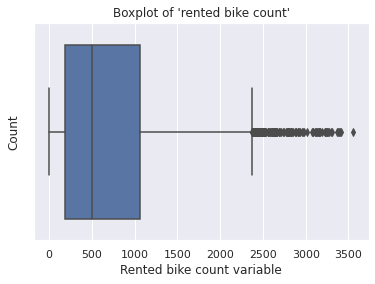

In [9]:
# checking the outliers using boxplot
sns.set_theme(style='darkgrid')
sns.boxplot(seoul_df['Rented Bike Count'])
plt.xlabel('Rented bike count variable')
plt.ylabel('Count')
plt.title("Boxplot of 'rented bike count'")
plt.show()

There are lot of outliers on the maximum side(above ~2500). We will deal with them later in this analysis. Let us now check the distribution of our variable.

In [10]:
import scipy.stats as stats
def plot_feature(df, feature):
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)

  #skewness and kurtosis
  print("Skewness: %f" % df[feature].skew())
  print("Kurtosis: %f" % df[feature].kurt())

  sns.distplot(df['Rented Bike Count'])

  ##Prob plot
  plt.subplot(1,2,2)
  stats.probplot(df[feature], dist="norm", plot=plt)
  plt.show()

Skewness: 1.153428
Kurtosis: 0.853387


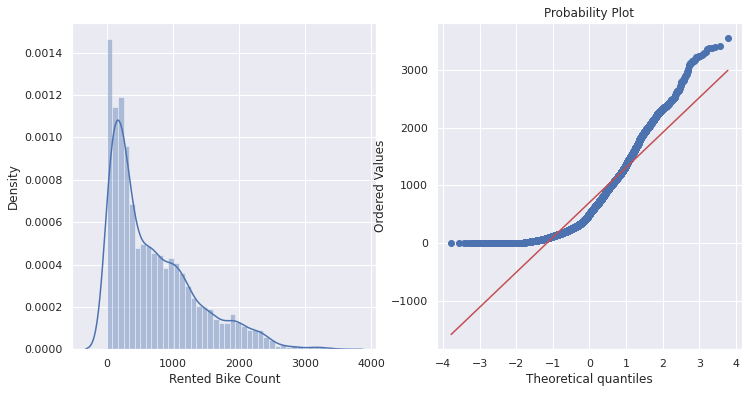

In [11]:
# plot distribution and probability plot
plot_feature(seoul_df,'Rented Bike Count')

Our dependant variable is positively skewed having value 1.153 and has peakedness of 0.853. Let's take square root of our dv and draw the plot. It will give us more clarification about data and we can visualize in a better way

In [12]:
# square root transformation - much better transformation reduces skewness
seoul_df['Rented Bike Count'] = np.sqrt(seoul_df['Rented Bike Count'])

Skewness: 0.237362
Kurtosis: -0.657201


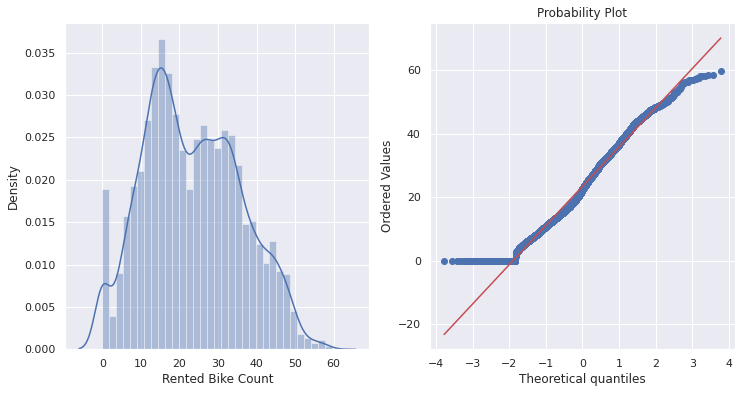

In [13]:
# plot distribution and probability plot
plot_feature(seoul_df,'Rented Bike Count')

Instead of removing the outlier, we have applied square root transformation on our dependant variable to shrink the values and make the data more normally distributed. Now ou dv somewhat resembles a normal distribution. Now we dont have to take care of the outliers as transformation has done the job for us.

Note: One should proceed with caution when considering to remove observations from the data. In many cases, there is a valid reason for these observations to exist.

**Date**

It is a numerical variable which tells us the date of bookings. Let us see the count of how many days we have. For that we will try to separate the date column into days, months and years.

In [14]:
# Converting date column to DateTime type
# extract day, month and year from 'Date'
seoul_df['Date'] = pd.to_datetime(seoul_df['Date'])
seoul_df['Day'] = seoul_df['Date'].dt.day
seoul_df['Month'] = seoul_df['Date'].dt.month
seoul_df['Year'] = seoul_df['Date'].dt.year

In [15]:
# checking no of years
seoul_df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [16]:
# printing unique values of each column 
for col in seoul_df.columns:
  print(f"{col}: \t{seoul_df[col].nunique()}")

Date: 	365
Rented Bike Count: 	2166
Hour: 	24
Temperature(°C): 	546
Humidity(%): 	90
Wind speed (m/s): 	65
Visibility (10m): 	1789
Dew point temperature(°C): 	556
Solar Radiation (MJ/m2): 	345
Rainfall(mm): 	61
Snowfall (cm): 	51
Seasons: 	4
Holiday: 	2
Functioning Day: 	2
Day: 	31
Month: 	12
Year: 	2


In [ ]:
# creating a list of categorical variables
cat_var = ['Functioning Day','Holiday','Seasons','Year','Month','Day']

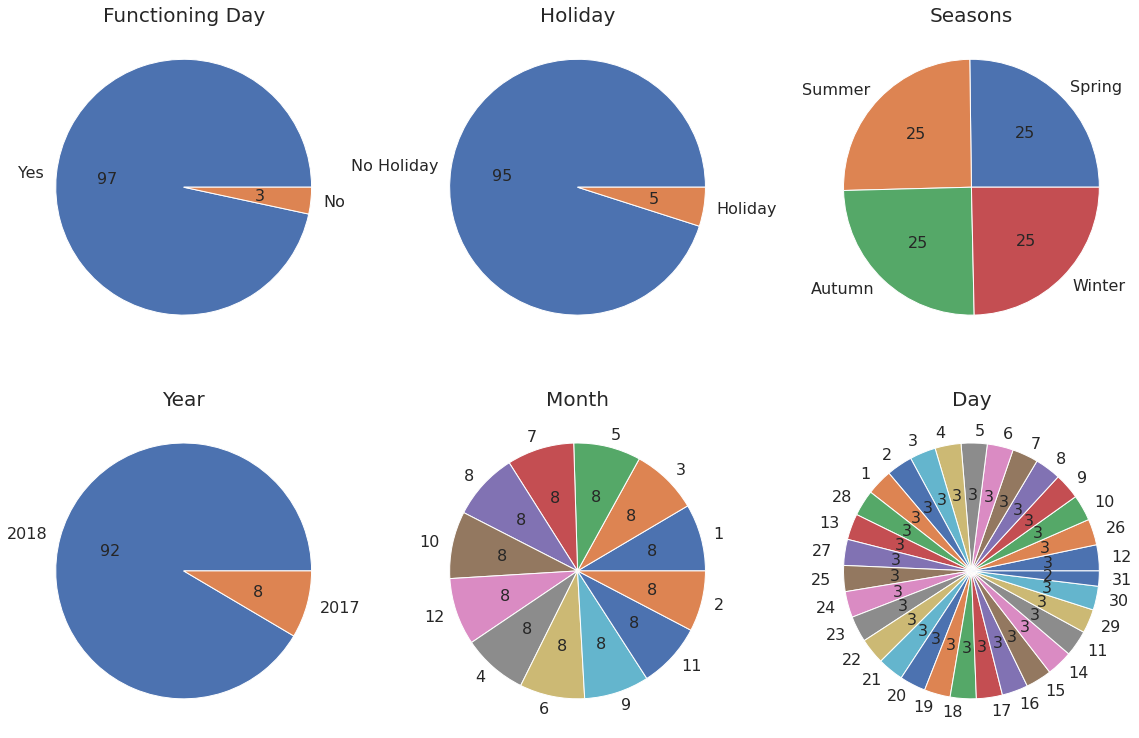

In [ ]:
plt.figure(figsize=(20,20))
for i, col in enumerate(cat_var):
    plt.subplot(3,3,i+1)
    seoul_df[col].value_counts().plot(kind = 'pie', fontsize=16, autopct='%.0f')
    plt.ylabel('')
    plt.title(col,fontsize=20)
plt.show()

* In Function Day, majority class is 'Yes' for this variabe. And almost 3% No.
* Again, for Holiday variable majority class is 'No Holiday' and only 5% is 'Holiday' class.
* In Seasons variable, we have an equal proportion of each of the seasons. We will see if it has any effect on our dependant variable in our multivariate analysis and if it does, will surely encode this in our prediction model.
* Most of the data if from year 2018.
* We have almost equal number of for each month.
* We have equal number of observations for each with little less observations for last days of months.


In [ ]:
# creating a list of numerical variable
num_var = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

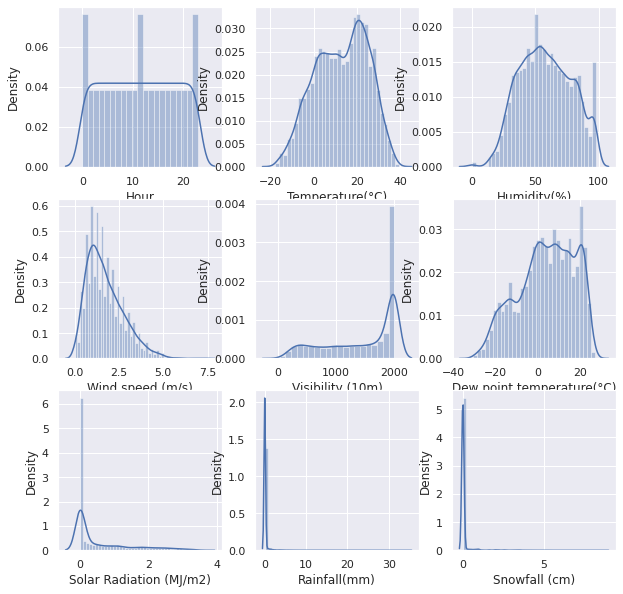

In [ ]:
# checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(num_var):
  plt.subplot(3,3,index+1)
  sns.distplot(seoul_df[item])

**Observations**

Most of the distribution are not normal. Also variable such as rainfall and snowfall  have almost all zeroes. Variables such as visibility and solar radiation are skewed.

In [ ]:
# checking data types of each column
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

## Multivariate Analysis

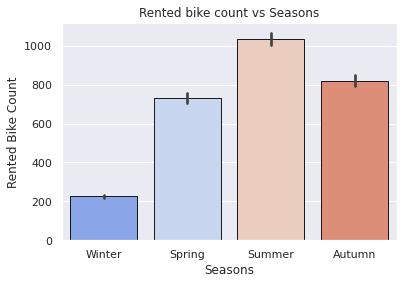

In [ ]:
# checking the mean rented bike count in each season
sns.barplot(x='Seasons', y='Rented Bike Count', data=seoul_df,
            palette='coolwarm', edgecolor='k')
plt.title('Rented bike count vs Seasons')
plt.show()

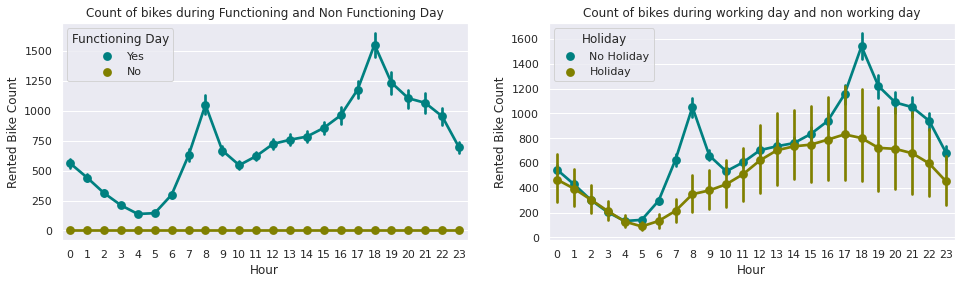

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

sns.pointplot(x='Hour',y='Rented Bike Count',hue='Functioning Day', data=seoul_df, ax=ax1, palette=['teal','olive'])
ax1.set_title('Count of bikes during Functioning and Non Functioning Day')

sns.pointplot(x='Hour',y='Rented Bike Count',hue='Holiday', data=seoul_df, ax=ax2, palette=['teal','olive'])
ax2.set_title('Count of bikes during working day and non working day')

plt.show()


* People don't use rented bikes in non functioning day.
* During working days there is a high demand around the 8th hour and 18th hour. There is a lower demand during 0 to 5th hour and 10 to 14th hour.
In the non workin days, there is a high demand for rented bike during 14 to 20th hour.

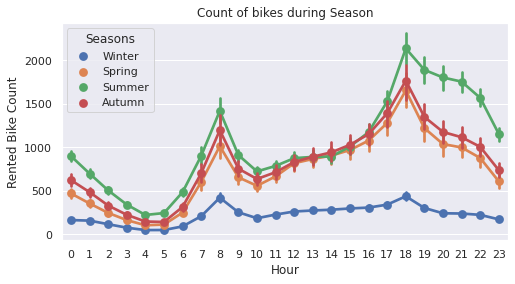

In [ ]:
# Anlysis of seasonal variation by using pointplot
plt.figure(figsize=(8,4))
sns.pointplot(data=seoul_df, x='Hour', y='Rented Bike Count', hue='Seasons')
plt.title('Count of bikes during Season')
plt.show()

The point plot above shows the use of reted bike in four different seasons.
* In the summer season the demand of rented bike is high and peak time is 7am to 9am and 5pm to 7pm.
* In winter season of the demand of rented bike is very less because of snowfall.

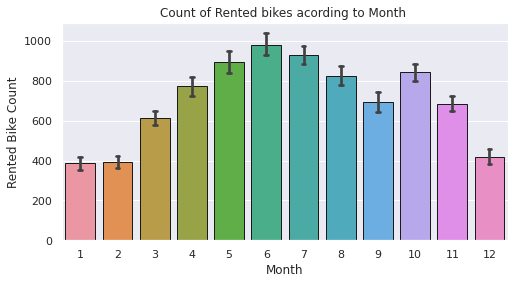

In [ ]:
#Anlysis of data by vizualisation
plt.figure(figsize=(8,4))
sns.barplot(data=seoul_df,x='Month',y='Rented Bike Count', 
            edgecolor='k', capsize=.1)
plt.title('Count of Rented bikes acording to Month ')
plt.show()

The number of rented bikes count is higher in the month of june compared to other months.

#### **Correlation**

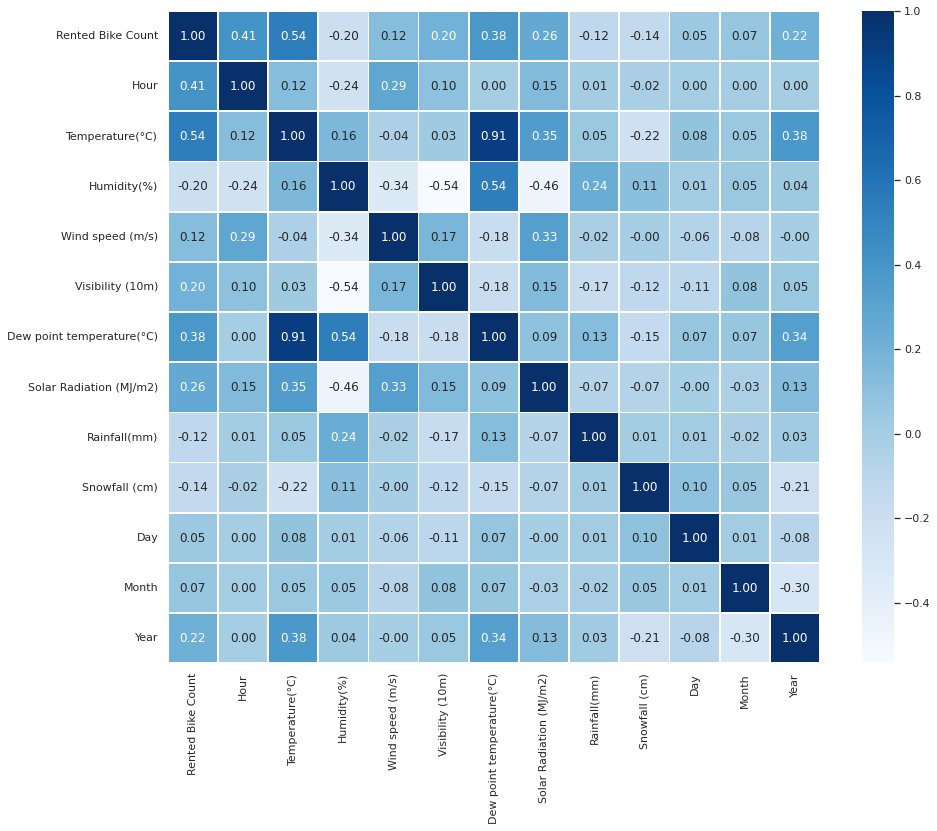

In [ ]:
# finding the correlation using heatmap
plt.figure(figsize=(15,12))
sns.heatmap(seoul_df.corr(), cmap='Blues', square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

#### **Multicollinearity**

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# Defining a function to calculate VIF
def calc_vif(X):
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [19]:
# calculating vif
calc_vif(seoul_df[[i for i in seoul_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.456946
1,Temperature(°C),188.757275
2,Humidity(%),187.140788
3,Wind speed (m/s),4.848147
4,Visibility (10m),10.695216
5,Dew point temperature(°C),127.016687
6,Solar Radiation (MJ/m2),2.909493
7,Rainfall(mm),1.103999
8,Snowfall (cm),1.152549
9,Day,4.420676


In [20]:
# calculating vif
calc_vif(seoul_df[[i for i in seoul_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year']]])

,variables,VIF
0,Hour,3.998419
1,Temperature(°C),3.236167
2,Humidity(%),6.757926
3,Wind speed (m/s),4.621365
4,Visibility (10m),5.455330
5,Solar Radiation (MJ/m2),2.280208
6,Rainfall(mm),1.081555
7,Snowfall (cm),1.136671
8,Day,3.849545
9,Month,4.603431


Great we have brought all the vif values around 5, thus handling the multicollinearity. VIF > 10 indicates a serious collinearity problem. 

#### **Numerical Features**

**Rainfall, Snowfall vs Rented Bike Count**

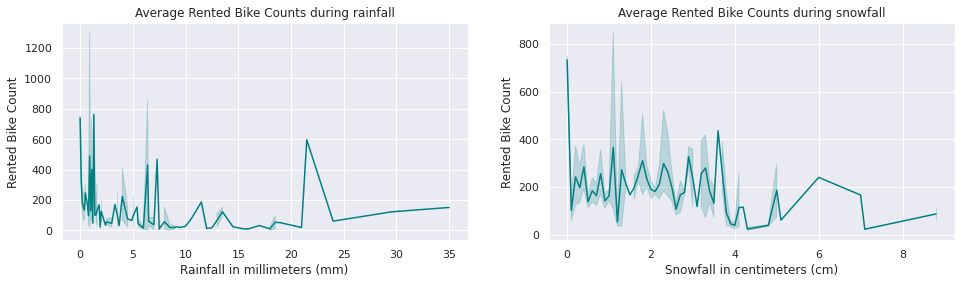

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

sns.lineplot(x='Rainfall(mm)', y='Rented Bike Count', data=seoul_df, ax=ax1, color='teal')
ax1.set_title('Average Rented Bike Counts during rainfall')
ax1.set_xlabel('Rainfall in millimeters (mm)')

sns.lineplot(x='Snowfall (cm)', y='Rented Bike Count', data=seoul_df, ax=ax2, color='teal')
ax2.set_title('Average Rented Bike Counts during snowfall')
ax2.set_xlabel('Snowfall in centimeters (cm)')

plt.show()

* When the rainfall is less than 8mm people take more bikes on rent. But, we can also see peak in between 20mm to 25mm.
* Demand for rented bikes are high when the snowfall is less than 4 cm.

**All numerical features**

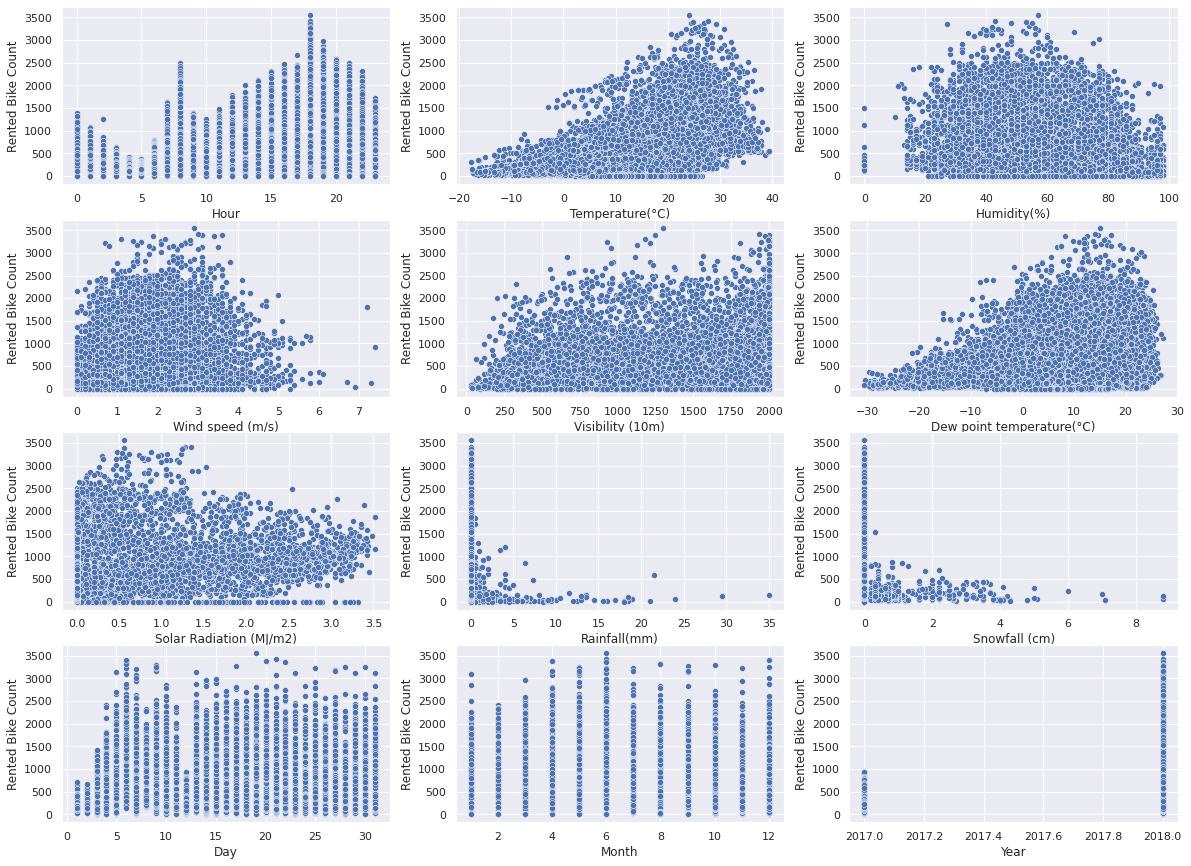

In [ ]:
# creating a list of nv we need
list2=[i for i in seoul_df.describe().columns.to_list() if i not in ['Rented Bike Count']]

# running a for loop over list2
plt.figure(figsize=(20,15))
for index,i in enumerate(list2):
  plt.subplot(4,3,index+1)
  sns.scatterplot(x=seoul_df[i],y=seoul_df['Rented Bike Count'])

**Observations**

* Demands for bike is higher during the office timings around 8 A.M to 8 P.M.
* Demand is high when the temperature is high.
* Demand is high when the visibility is high.
* Demand is high when the windspeed is less and solar radiation is less.
* Demand is high wheh the humidity is moderate. Bike count decreases when the humidity is high.
* Demand is almost the same for each day.

### **Data Wrangling**

**Missing Values**

In [21]:
# create a copy to make changes in dataset
seoul_df_copy = seoul_df.copy()

In [22]:
# checking for missing values
print('The no. of missing values in each variable:\n',seoul_df_copy.isna().sum())

The no. of missing values in each variable:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
dtype: int64


We dont have any missing values in our dataset. We can proceed further.

**Outliers**

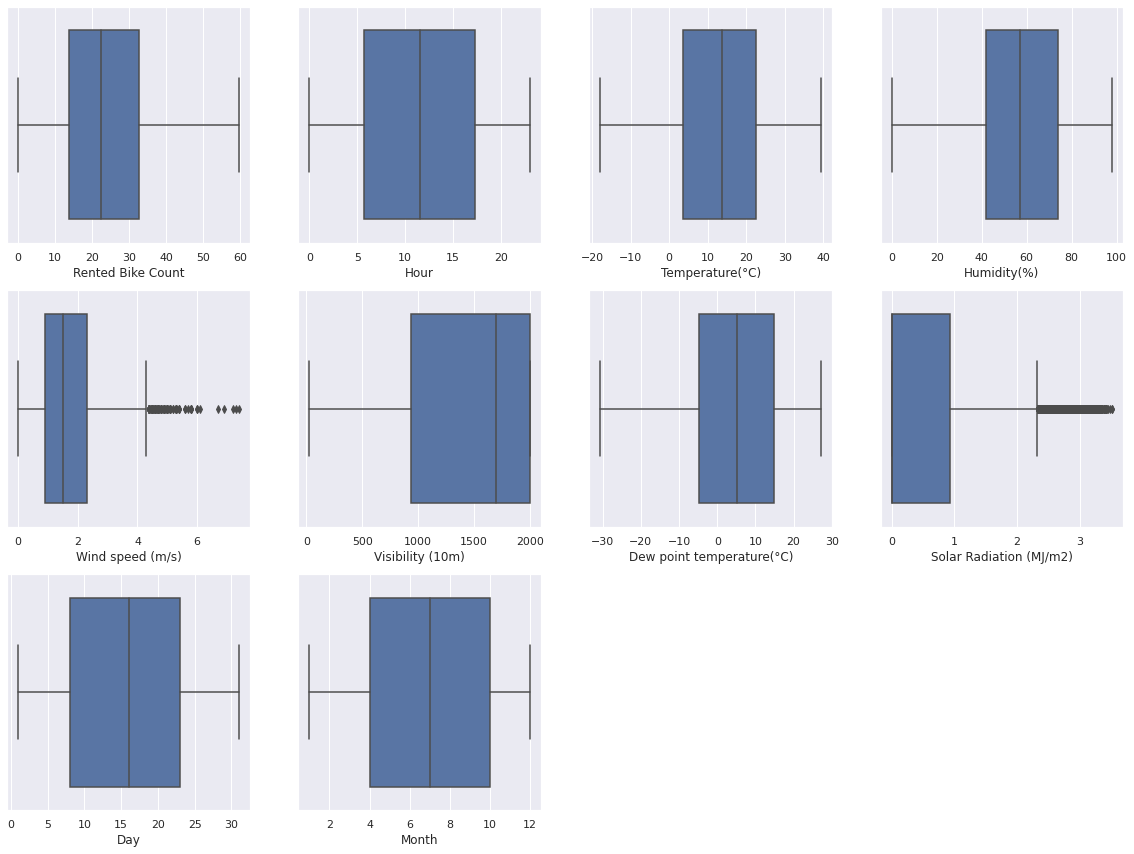

In [23]:
# looking for outliers using box plot
plt.figure(figsize=(20,20))
for index,item in enumerate([i for i in seoul_df_copy.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)','Holiday','Year']]):
  plt.subplot(4,4,index+1)
  sns.boxplot(seoul_df_copy[item])

* We have handled ouliers in our dv 'Rented bike count' by applying transformation.

* Wind speed and solar radiation have outliers but as they are not that far from the maximum values we will keep them.

**Transforming categorical variables into the numerical variables**

In [24]:
# Transforming the 'Holiday' variable
seoul_df_copy['Holiday'] = seoul_df_copy['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)

In [25]:
# # Mapping the 'Function Day' variable
# seoul_df_copy['Functioning Day'] = seoul_df_copy['Functioning Day'].map({'Yes':1, 'No':0})

In [26]:
# check value counts
seoul_df_copy['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
# display all rows
pd.set_option('display.max_rows', None)
seoul_df_copy[seoul_df_copy['Functioning Day'] == 'No'][['Rented Bike Count']]

,Rented Bike Count
3144,0
3145,0
3146,0
3147,0
3148,0
3149,0
3150,0
3151,0
3152,0
3153,0


In [27]:
# since there was no bike rented in the non functioning day we gonna drop the rows
seoul_df_copy = seoul_df_copy[seoul_df_copy['Functioning Day'] == 'Yes']
seoul_df_copy.drop(['Functioning Day'], axis=1, inplace=True)  # remove this column as it has constant values now

In [28]:
# one hot encoding the season variable
seoul_df_copy = pd.get_dummies(seoul_df_copy, columns=['Seasons'], drop_first=True)    # drop one of the dummies to avoid multicollinearity (dummy variable trap)

In [29]:
# removing unwanted columns
seoul_df_copy.drop(['Date','Year','Dew point temperature(°C)'], axis=1, inplace=True)

In [30]:
# checking the modifications
seoul_df_copy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,12,1,0,0,1
1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,12,1,0,0,1
2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,12,1,0,0,1
3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,12,1,0,0,1
4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,12,1,0,0,1


Now our dataframe is ready for the regression machine learning algorithms. 

In [31]:
# check number of rows and columns in the data
seoul_df_copy.shape

(8465, 15)

### **Train Test Split and Standardization**
Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [32]:
# let us have a look at our independent features
features=seoul_df_copy.columns.tolist()
features.pop(0)
print('The independent features are:\n',features)

The independent features are:
 ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Day', 'Month', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']


In [33]:
# creating a variable to store independant features and dependant feature
X = seoul_df_copy[features]
y = seoul_df_copy['Rented Bike Count']

In [ ]:
# # Transforming Dependant variable
# y = np.sqrt(y)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)   # random_state=0 to ensure same observations in each set everytime we run

In [36]:
# checking the shapes
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(6772, 14), X_test=(1693, 14)
The shapes of train and test set for dependent variables are: y_train=(6772,), y_test=(1693,)


Now that we have splitted our data other important step one should perform, is to standardize or normalize the independent variables. This is to ensure a consistent range of values are fed into the model. Also it make the predictors mean 0 so it is easy to find the intercept. We will be using StandardScaler to standardize our data. It is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

In [37]:
# before transformation
X_train.values

array([[ 3. , -5.5, 56. , ...,  0. ,  0. ,  1. ],
       [ 1. ,  1.7, 71. , ...,  0. ,  0. ,  1. ],
       [ 1. , 20. , 59. , ...,  0. ,  0. ,  0. ],
       ...,
       [11. , 27.5, 31. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  9.6, 31. , ...,  1. ,  0. ,  0. ],
       [20. ,  7.1, 83. , ...,  1. ,  0. ,  0. ]])

In [38]:
# standardizing the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [39]:
# after transformation
X_train

array([[-1.22342517, -1.50763958, -0.09760913, ..., -0.58144258,
        -0.5985006 ,  1.71249422],
       [-1.51139998, -0.91470052,  0.63646474, ..., -0.58144258,
        -0.5985006 ,  1.71249422],
       [-1.51139998,  0.59235291,  0.04920564, ..., -0.58144258,
        -0.5985006 , -0.58394358],
       ...,
       [-0.07152593,  1.20999775, -1.32106558, ..., -0.58144258,
         1.6708421 , -0.58394358],
       [-1.65538739, -0.26411462, -1.32106558, ...,  1.71986027,
        -0.5985006 , -0.58394358],
       [ 1.22436071, -0.46999623,  1.22372383, ...,  1.71986027,
        -0.5985006 , -0.58394358]])

# **Fitting Models**

**Evaluation Metrics**

In [40]:
comparison_columns = ['Model_Name', 'train_mae', 'train_mse', 'train_rmse', 'train_r2', 'train_adjr2',
                    'test_mae', 'test_mse', 'test_rmse', 'test_r2_', 'test_adjr2']

In [41]:
def evaluate(model_name, model_variable, X_train, y_train, X_test, y_test):  

    # make predictions
    y_pred_train = model_variable.predict(X_train)
    y_pred_test = model_variable.predict(X_test)      

    # train set evaluation
    ### np.power to get back the original values of y that we transformed earlier
    train_r2 = r2_score(np.power(y_train,2), np.power(y_pred_train,2))      
    train_adjr2 = 1-(1-r2_score(np.power(y_train,2), np.power(y_pred_train,2)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
    train_mae = mean_absolute_error(np.power(y_train,2), np.power(y_pred_train,2))
    train_mse = mean_squared_error(np.power(y_train,2), np.power(y_pred_train,2))
    train_rmse = np.sqrt(mean_squared_error(np.power(y_train,2), np.power(y_pred_train,2)))
    
    # test set evaluation
    test_r2 = r2_score(np.power(y_test,2), np.power(y_pred_test,2))
    test_adjr2 = 1-(1-r2_score(np.power(y_test,2), np.power(y_pred_test,2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    test_mae = mean_absolute_error(np.power(y_test,2), np.power(y_pred_test,2))
    test_mse =  mean_squared_error(np.power(y_test,2), np.power(y_pred_test,2))
    test_rmse = np.sqrt(mean_squared_error(np.power(y_test,2), np.power(y_pred_test,2)))

    print("Train Set:")
    print('R2_score: ', train_r2)
    print('Adjusted R2 :', train_adjr2)
    print('MAE:', train_mae)
    print('MSE:', train_mse)
    print('RMSE:', train_rmse)
    print('__________________________________\n')
    print("Test Set:")
    print('R2_score: ', test_r2)
    print('Adjusted R2:', test_adjr2)
    print('MAE:', test_mae)
    print('MSE:', test_mse)
    print('RMSE:', test_rmse)

    # Storing results
    global comparison_columns
    eval_metrics = [model_name, train_mae, train_mse, train_rmse, train_r2, train_adjr2, test_mae, test_mse, test_rmse, test_r2, test_adjr2]
    final_dict = dict(zip(comparison_columns, eval_metrics))
    return [final_dict]

In [42]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for i in dict_list:
    final_list.append(i)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

### **Linear Regression**

In [43]:
# making a linear regression model
lr = LinearRegression()

# fitting the data
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
# checking the coefficients
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Hour,3.611361
Temperature(°C),6.023223
Humidity(%),-3.433724
Wind speed (m/s),0.135183
Visibility (10m),-0.067188
Solar Radiation (MJ/m2),-0.792319
Rainfall(mm),-1.849146
Snowfall (cm),0.066704
Holiday,-0.573122
Day,0.012682


These coefficients are the values of the betas. They tell us which feature is affecting our depending variable. The number depicts how much change the dependant variable has when each variable changes.

In [45]:
# looking the predicted values for test set
np.power(lr.predict(X_test),2)    # np.power to get back the original values of y that we transformed earlier

array([148.59797904, 940.81457741, 447.69674348, ..., 775.18510154,
       198.46937402, 450.75573443])

In [46]:
# evaluating the model
linear_regression = evaluate('Linear Regression', lr, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  0.5715588248097361
Adjusted R2 : 0.5706711266518756
MAE: 287.75953451456826
MSE: 178789.625136286
RMSE: 422.8352222039763
__________________________________

Test Set:
R2_score:  0.563508431685739
Adjusted R2: 0.5598666665150598
MAE: 284.04983333107765
MSE: 171550.1544554561
RMSE: 414.18613503527143


As expected, Linear Regression won't fit very well to this kind of data.
The r2_score for the train set is 0.57 that means our model is not able to capture most of the data variance. The r2_score for the test set is 0.56 that means our model is not performing well on the data. Even though variance is very low between them, we cannot consider this as best fit model. So there is  no use of trying other Linear type regressor.

Text(0.5, 0, 'actual values')

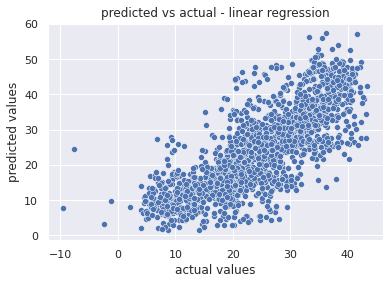

In [ ]:
# visualizing the predictions
sns.scatterplot(x=lr.predict(X_test), y=y_test)
plt.title('predicted vs actual - linear regression')
plt.ylabel('predicted values')
plt.xlabel('actual values')

The predicted and actual values have a lot of variance.

Text(0.5, 1.0, 'Residual Analysis - Linear Regression')

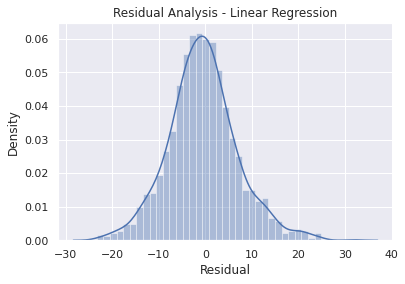

In [ ]:
# residual analysis
sns.distplot((y_test) - (lr.predict(X_test)))
plt.xlabel('Residual')
plt.title('Residual Analysis - Linear Regression')

Text(0.5, 1.0, 'Predicted values vs residuals - Heteroscedasticity(LR)')

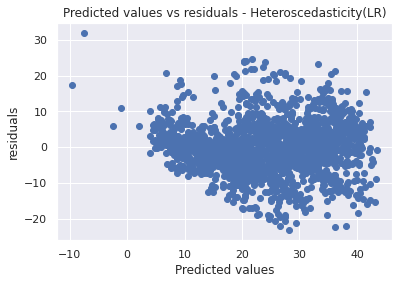

In [ ]:
# one of the assumptions of linear regression is homoscedasticity
plt.scatter(lr.predict(X_test), y_test - lr.predict(X_test))
plt.xlabel('Predicted values')
plt.ylabel('residuals')
plt.title('Predicted values vs residuals - Heteroscedasticity(LR)')

It looks like our model has heteroscedasticity. One of the assumptions of linear regression is that there should be homoscedasticity i.e., constant variance throughout.

ways to treat homoscedasticity:
* transform the dependant variabel
* use weighted regression


In [47]:
#add results to comparison table
add_list_to_final_df(linear_regression)

### **Decision Tree Regressor**

In [48]:
# Create a Decision Tree Regressor Object from DecisionTreeRegressor class
dt_reg = DecisionTreeRegressor()

# Fit the decision tree regressor with the training data represented by X_train and y_train
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
# decision tree evaluation
decision_tree = evaluate("Decision Tree Regressor", dt_reg, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  1.0
Adjusted R2 : 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
__________________________________

Test Set:
R2_score:  0.718130523382692
Adjusted R2: 0.7157788114204499
MAE: 191.3579444772593
MSE: 110780.49556999409
RMSE: 332.8370405618853


We see clearly that our model is performing well on the training set, but is not performing that good on the test set. This is obvious case of overfitting where the model has captured even the extra noise in the data.

In [50]:
# add results to comparison table
add_list_to_final_df(decision_tree)

### **Hyperparameter Tuning - Decision Tree Regressor**

In [51]:
param_dict = {
     #'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1,50,2),
    #'min_samples_split': [10,15,20],
    'min_samples_leaf': np.arange(2,15)
}

In [52]:
# Create an instance of Decision Tree Regressor 
dtr_model = DecisionTreeRegressor()

# Grid Search
dtr_grid = GridSearchCV(estimator=dtr_model, 
                        param_grid=param_dict, 
                        cv=5, verbose=3, scoring='neg_mean_squared_error')

dtr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 650 candidates, totalling 3250 fits
[CV 1/5] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-96.385 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-97.846 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-100.966 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-101.028 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-95.479 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=2, splitter=random;, score=-107.444 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=2, splitter=random;, score=-104.596 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=2, splitter=random;, score=-108.447 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=2, splitter=random;, score=-107.271 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=2, splitter=random;, sco

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [53]:
# storing the best estimator in a variable
dtr_optimal_model = dtr_grid.best_estimator_
dtr_optimal_model

DecisionTreeRegressor(max_depth=13, min_samples_leaf=12)

In [54]:
# checking the best parameters
dtr_grid.best_params_

{'max_depth': 13, 'min_samples_leaf': 12, 'splitter': 'best'}

In [55]:
# evaluation the model
decision_tree_tuned = evaluate("Decision Tree Regressor - tuned", dtr_optimal_model, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  0.8923831467560075
Adjusted R2 : 0.8921601726631533
MAE: 132.7702117549142
MSE: 44908.794868503486
RMSE: 211.916952763349
__________________________________

Test Set:
R2_score:  0.8013074300154529
Adjusted R2: 0.799649685093055
MAE: 173.49622456245015
MSE: 78090.26231970616
RMSE: 279.44634962673274


After hyperparameter tuning and cross validation the r2_score of training and test set are 0.89 and 0.80 respectively. Still there's a difference of almost 10. Let's try Random Forest Regressor

In [56]:
# add results to comparison table
add_list_to_final_df(decision_tree_tuned)

### **Random Forest**

In [57]:
# implementing random forest regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
# looking the predicted values for test set
np.power(rfr.predict(X_test),2)

array([  52.88458012,  531.41207546,  421.13172951, ..., 1123.12401321,
        161.53921587,  405.77011103])

In [59]:
# random forest evaluation
random_forest = evaluate('Random Forest Regressor', rfr, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  0.9828939540411384
Adjusted R2 : 0.98285851158984
MAE: 50.095421588371316
MSE: 7138.397804998009
RMSE: 84.48903955542404
__________________________________

Test Set:
R2_score:  0.8608521104284755
Adjusted R2: 0.8596911626012995
MAE: 142.96644981168674
MSE: 54687.97951890671
RMSE: 233.85461192567212


The r2_score for training set and test set is 0.98 and 0.86 respectively. To overcome this variance, let's tune the hyperparameters.

In [60]:
# add results to comparison table
add_list_to_final_df(random_forest)

### **Random Forest Regressor - Hyperparameter Tuning**

In [61]:
# Setting the parameters to tune

# Number of trees
n_estimators = [80,100,150]

# Maximum depth of trees
max_depth = [12,14,16]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [62]:
# Grid search
rf_grid = GridSearchCV(estimator=rfr,param_grid = param_dict,cv = 5,scoring='neg_mean_squared_error')
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 14, 16],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [80, 100, 150]},
             scoring='neg_mean_squared_error')

In [63]:
# checking the ebest estimator
rf_grid.best_estimator_

RandomForestRegressor(max_depth=16, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=80)

In [64]:
# checking the best parameters
rf_grid.best_params_

{'max_depth': 16,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [65]:
# storing the best estimator in a variable
rf_optimal_model=rf_grid.best_estimator_

In [66]:
# looking the predicted values for test set
np.power(rf_optimal_model.predict(X_test),2)

array([  62.35284167,  719.20891061,  414.77720774, ..., 1009.61472846,
        148.58933967,  342.30246884])

In [67]:
# evaluating the random forest tuned model
random_forest_tuned = evaluate('Random Forest Regressor - Tuned', rf_optimal_model, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  0.8490220220036977
Adjusted R2 : 0.8487092068946334
MAE: 160.31644547070107
MSE: 63003.50585539783
RMSE: 251.0049916941849
__________________________________

Test Set:
R2_score:  0.7979633783703582
Adjusted R2: 0.7962777331362612
MAE: 180.08548949629827
MSE: 79404.54332274717
RMSE: 281.78811778133434


After hyperparameter tuning and cross validation the r2_score of training and test set are 0.85 and 0.80 respectively. There is not much difference between the two. It is reasonanle to say that this model has overcome underfitting.

In [68]:
# add results to comparison table
add_list_to_final_df(random_forest_tuned)

### **XGBoost**

In [69]:
# implementing XGBoost regressor
xgb_reg = XGBRegressor(random_state=0, objective='reg:squarederror')
xgb_reg.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [70]:
# looking the predicted values for test set
np.power(xgb_reg.predict(X_test),2)

array([  73.62784,  459.84253,  427.80844, ..., 1085.5499 ,  197.0199 ,
        353.8329 ], dtype=float32)

In [71]:
# xgboost evaluation
xgbr = evaluate('XGBoost Regressor', xgb_reg, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  0.8656635395969862
Adjusted R2 : 0.8653852044710957
MAE: 148.38372448245389
MSE: 56058.95695464934
RMSE: 236.76772785717512
__________________________________

Test Set:
R2_score:  0.8301154803189944
Adjusted R2: 0.8286980886172458
MAE: 163.2723375399098
MSE: 66768.10666336831
RMSE: 258.39525278798817


XGBoost model has performed better than the Linear Regression, Decision Tree and Random Forest model. MAE, RMSE errors are also smaller. Even though this can be considered a good model, let's try to tune the hyperparameters and see if the performance improves.

In [72]:
# add results to comparison table
add_list_to_final_df(xgbr)

### **Hyperparameter Tuning - Optuna**

In [73]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 210 kB 59.4 MB/s 
     |████████████████████████████████| 81 kB 9.1 MB/s 
     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 112 kB 57.4 MB/s 
     |████████████████████████████████| 146 kB 51.9 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=571c1c640ebb600c21b2a94a11386d746873c44576682a67cc261e7d1356b980
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [74]:
import optuna 
from optuna import Trial, visualization
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [264]:
def objective(trial): 
  param = {
            "n_estimators" : trial.suggest_int('n_estimators', 40,50,2),
            'max_depth':trial.suggest_int('max_depth', 3,5),
            #'reg_alpha':trial.suggest_uniform('reg_alpha',0,6),
            #'reg_lambda':trial.suggest_uniform('reg_lambda',0,2),
            'min_child_weight':trial.suggest_int('min_child_weight', 1,10),
            'gamma':trial.suggest_int('gamma', 0, 2),
            'learning_rate':trial.suggest_categorical('learning_rate', [0.28,0.26,0.27]),
            #'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.2,0.8),
            'subsample':trial.suggest_categorical('subsample', [0.3,0.5,0.6]),
            'nthread' : -1
  }
  xgb_model = xgb.XGBRegressor(**param, objective='reg:squarederror')  
  score = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring="r2")
  r2_mean = score.mean()
  return r2_mean

In [265]:
# Find the optimal value with optuna
study1 = optuna.create_study(direction='maximize')      
study1.optimize(objective, n_trials=50, show_progress_bar=True)  # best trial 50

[I 2022-05-25 08:21:17,398] A new study created in memory with name: no-name-4aef3288-f1b7-4007-b4e6-e590867507d4


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2022-05-25 08:21:21,483] Trial 0 finished with value: 0.8943310505434596 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.26, 'subsample': 0.5}. Best is trial 0 with value: 0.8943310505434596.
[I 2022-05-25 08:21:23,728] Trial 1 finished with value: 0.8780955795215281 and parameters: {'n_estimators': 44, 'max_depth': 3, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.26, 'subsample': 0.5}. Best is trial 0 with value: 0.8943310505434596.
[I 2022-05-25 08:21:26,884] Trial 2 finished with value: 0.8908885901138452 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.27, 'subsample': 0.6}. Best is trial 0 with value: 0.8943310505434596.
[I 2022-05-25 08:21:29,470] Trial 3 finished with value: 0.8831773914314306 and parameters: {'n_estimators': 46, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.27, 'subsample': 0.3}. Best is trial 0 with value: 0.89

In [266]:
best_param = study1.best_trial.params
best_param

{'gamma': 2,
 'learning_rate': 0.26,
 'max_depth': 5,
 'min_child_weight': 7,
 'n_estimators': 46,
 'subsample': 0.6}

In [267]:
# Fits tuned Hyperparameters
xgb_optimal = xgb.XGBRegressor(**best_param)
xgb_optimal.fit(X_train, y_train)

[08:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=2, learning_rate=0.26, max_depth=5, min_child_weight=7,
             n_estimators=46, subsample=0.6)

In [268]:
# evaluate the model
xgb_optuna = evaluate("XGBoost Regressor - tuned", xgb_optimal, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  0.9195479786337708
Adjusted R2 : 0.9193812880463611
MAE: 114.85264735353469
MSE: 33572.839340515966
RMSE: 183.2289260474884
__________________________________

Test Set:
R2_score:  0.85729067736352
Adjusted R2: 0.8561000155536805
MAE: 147.32617867605543
MSE: 56087.69588624789
RMSE: 236.82841021770994


In [269]:
# add results to comparison table
add_list_to_final_df(xgb_optuna)

In [272]:
optuna.visualization.plot_optimization_history(study1)

In [273]:
optuna.visualization.plot_param_importances(study1)

let's try to minimize the maximum depth and see the effect on our model

In [274]:
def objective(trial): 
  param = {
            "n_estimators" : trial.suggest_int('n_estimators', 40,50,2),
            'max_depth':trial.suggest_int('max_depth', 3,5),
            #'reg_alpha':trial.suggest_uniform('reg_alpha',0,6),
            #'reg_lambda':trial.suggest_uniform('reg_lambda',0,2),
            'min_child_weight':trial.suggest_int('min_child_weight', 1,10),
            'gamma':trial.suggest_uniform('gamma', 0, 1),
            'learning_rate': 0.1,                           # trial.suggest_categorical('learning_rate', [0.28,0.26,0.27]),
            #'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.2,0.8),
            'subsample':trial.suggest_uniform('subsample', 0.3,0.6),
            'nthread' : -1
  }
  xgb_model = xgb.XGBRegressor(**param, objective='reg:squarederror')  
  score = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring="r2")
  r2_mean = score.mean()
  return r2_mean

In [275]:
# Find the optimal value with optuna
study1 = optuna.create_study(direction='maximize')      
study1.optimize(objective, n_trials=50, show_progress_bar=True)  # best trial 50

[I 2022-05-25 09:14:28,366] A new study created in memory with name: no-name-4d427b23-a099-47a0-b83f-1b58dc5fb4d5


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2022-05-25 09:14:32,062] Trial 0 finished with value: 0.871155169023354 and parameters: {'n_estimators': 46, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.9863816876815719, 'subsample': 0.35734462863439354}. Best is trial 0 with value: 0.871155169023354.
[I 2022-05-25 09:14:34,177] Trial 1 finished with value: 0.8376780808178467 and parameters: {'n_estimators': 42, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.08821857655938059, 'subsample': 0.5824436068642825}. Best is trial 0 with value: 0.871155169023354.
[I 2022-05-25 09:14:36,671] Trial 2 finished with value: 0.8504201355433603 and parameters: {'n_estimators': 50, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.5652313248790191, 'subsample': 0.5181965518014184}. Best is trial 0 with value: 0.871155169023354.
[I 2022-05-25 09:14:39,785] Trial 3 finished with value: 0.8808106986042841 and parameters: {'n_estimators': 40, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.9618992994602454, 'subsample': 0.38914106858319714

In [276]:
best_param = study1.best_trial.params
best_param

{'gamma': 0.05475126821425552,
 'max_depth': 5,
 'min_child_weight': 8,
 'n_estimators': 50,
 'subsample': 0.5283350096392881}

In [277]:
# Fits tuned Hyperparameters
xgb_optimal = xgb.XGBRegressor(**best_param)
xgb_optimal.fit(X_train, y_train)

[09:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=0.05475126821425552, max_depth=5, min_child_weight=8,
             n_estimators=50, subsample=0.5283350096392881)

In [278]:
# evaluate the model
xgb_optuna = evaluate("XGBoost Regressor - tuned", xgb_optimal, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  0.889832880654833
Adjusted R2 : 0.8896046226008398
MAE: 134.06798333556287
MSE: 45973.02759549168
RMSE: 214.413216932846
__________________________________

Test Set:
R2_score:  0.8466520641507889
Adjusted R2: 0.8453726415632508
MAE: 153.8087644402402
MSE: 60268.88945863298
RMSE: 245.4972290243476


In [279]:
comparison_df

,Model_Name,train_mae,train_mse,train_rmse,train_r2,train_adjr2,test_mae,test_mse,test_rmse,test_r2_,test_adjr2
0,Linear Regression,287.759535,178789.625136,422.835222,0.571559,0.570671,284.049833,171550.154455,414.186135,0.563508,0.559867
1,Decision Tree Regressor,0.000000,0.000000,0.000000,1.000000,1.000000,191.357944,110780.495570,332.837041,0.718131,0.715779
2,Decision Tree Regressor - tuned,132.770212,44908.794869,211.916953,0.892383,0.892160,173.496225,78090.262320,279.446350,0.801307,0.799650
3,Random Forest Regressor,50.095422,7138.397805,84.489040,0.982894,0.982859,142.966450,54687.979519,233.854612,0.860852,0.859691
4,Random Forest Regressor - Tuned,160.316445,63003.505855,251.004992,0.849022,0.848709,180.085489,79404.543323,281.788118,0.797963,0.796278
5,XGBoost Regressor,148.383724,56058.956955,236.767728,0.865664,0.865385,163.272338,66768.106663,258.395253,0.830115,0.828698
6,XGBoost Regressor - tuned,114.852647,33572.839341,183.228926,0.919548,0.919381,147.326179,56087.695886,236.828410,0.857291,0.856100
7,XGBoost Regressor - tuned,128.441927,41044.691973,202.594896,0.901643,0.901439,153.389087,59845.849817,244.634114,0.847728,0.846458


In [223]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(40,50,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(3,5,1,dtype='int64'))

# learning rate
learning_rate=[0.28,0.26,0.27]

# min childs weight
min_child_weight=list(np.linspace(1,5,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [226]:
xgb_model=XGBRegressor(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

[08:00:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=-1)

In [227]:
# Random search
xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,scoring='neg_mean_squared_error',n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

[08:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                  1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                  2],
                                        'learning_rate': [0.28, 0.26, 0.27],
                                        'max_depth': [3, 4],
                                        'min_child_weight': [1],
                                        'n_estimators': [40, 42, 44, 46, 48],
                                        'subsample': [0.3, 0.5, 0.6]},
                   random_state=0, scoring='neg_mean_squared_error')

In [228]:
# checking th ebest estimator
xgb_random.best_estimator_

XGBRegressor(learning_rate=0.28, max_depth=4, n_estimators=46, n_jobs=-1,
             subsample=0.5)

In [229]:
# checking the best parameters
xgb_random.best_params_

{'gamma': 0,
 'learning_rate': 0.28,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 46,
 'subsample': 0.5}

In [230]:
# storing the best estimator in a variable
xgb_optimal_model2=xgb_random.best_estimator_

In [231]:
# predicting on both train and test
y_pred_train6=xgb_optimal_model2.predict(X_train)
y_pred_test6=xgb_optimal_model2.predict(X_test)

In [232]:
# looking the predicted values for test set
np.power(y_pred_test6,2)

array([  86.576645,  442.4591  ,  403.4141  , ..., 1218.9135  ,
        166.6129  ,  377.17975 ], dtype=float32)

In [233]:
# evaluate the model
xgb_optimal2 = evaluate("XGBoost Regressor - tuned", xgb_optimal_model2, X_train, y_train, X_test, y_test)

Train Set:
R2_score:  0.9016428607043714
Adjusted R2 : 0.9014390720481424
MAE: 128.441926835444
MSE: 41044.69197278622
RMSE: 202.59489621603555
__________________________________

Test Set:
R2_score:  0.8477284446258739
Adjusted R2: 0.8464580025667334
MAE: 153.38908709803067
MSE: 59845.84981672922
RMSE: 244.63411417202062


In [270]:
# add results to comparison table
add_list_to_final_df(xgb_optimal2)

In [271]:
comparison_df

,Model_Name,train_mae,train_mse,train_rmse,train_r2,train_adjr2,test_mae,test_mse,test_rmse,test_r2_,test_adjr2
0,Linear Regression,287.759535,178789.625136,422.835222,0.571559,0.570671,284.049833,171550.154455,414.186135,0.563508,0.559867
1,Decision Tree Regressor,0.000000,0.000000,0.000000,1.000000,1.000000,191.357944,110780.495570,332.837041,0.718131,0.715779
2,Decision Tree Regressor - tuned,132.770212,44908.794869,211.916953,0.892383,0.892160,173.496225,78090.262320,279.446350,0.801307,0.799650
3,Random Forest Regressor,50.095422,7138.397805,84.489040,0.982894,0.982859,142.966450,54687.979519,233.854612,0.860852,0.859691
4,Random Forest Regressor - Tuned,160.316445,63003.505855,251.004992,0.849022,0.848709,180.085489,79404.543323,281.788118,0.797963,0.796278
5,XGBoost Regressor,148.383724,56058.956955,236.767728,0.865664,0.865385,163.272338,66768.106663,258.395253,0.830115,0.828698
6,XGBoost Regressor - tuned,114.852647,33572.839341,183.228926,0.919548,0.919381,147.326179,56087.695886,236.828410,0.857291,0.856100
7,XGBoost Regressor - tuned,128.441927,41044.691973,202.594896,0.901643,0.901439,153.389087,59845.849817,244.634114,0.847728,0.846458


In [ ]:
def objective(trial): 
  param = {
            "n_estimators" : trial.suggest_int('n_estimators', 40,50,2),
            'max_depth':trial.suggest_int('max_depth', 3,5),
            #'reg_alpha':trial.suggest_uniform('reg_alpha',0,6),
            #'reg_lambda':trial.suggest_uniform('reg_lambda',0,2),
            'min_child_weight':trial.suggest_int('min_child_weight', 1,10),
            'gamma':trial.suggest_int('gamma', 0, 2),
            'learning_rate':trial.suggest_categorical('learning_rate', [0.28,0.26,0.27]),
            #'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.2,0.8),
            'subsample':trial.suggest_categorical('subsample', [0.3,0.5,0.6]),
            'nthread' : -1
  }
  xgb_model = xgb.XGBRegressor(**param, objective='reg:squarederror')  
  score = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring="r2")
  r2_mean = score.mean()
  return r2_mean

In [ ]:
# Find the optimal value with optuna
study1 = optuna.create_study(direction='maximize')      
study1.optimize(objective, n_trials=50, show_progress_bar=True)  # best trial 50

In [ ]:
best_param = study1.best_trial.params
best_param

In [ ]:
# Fits tuned Hyperparameters
xgb_optimal = xgb.XGBRegressor(**best_param)
xgb_optimal.fit(X_train, y_train)

In [ ]:
# evaluate the model
xgb_optuna = evaluate("XGBoost Regressor - tuned", xgb_optimal, X_train, y_train, X_test, y_test)